# Benchmark results

This section investigates how scalable is our software. We report median run time and memory usage for our core functions `L0_normal_reg`, `L0_logistic_reg`, and `L0_poisson_reg` on 1 million SNPs with sample sizes ranging from 10000, 20000, ..., 120000 with 5 separate runs. Every run is performed on a intel-E5-2670 machine which has 63G of RAM and 3.3GHz processor. 

In [48]:
using DelimitedFiles
using DataFrames
using Statistics
using Plots
using StatPlots

In [24]:
#specify directories for different benchmark results
dir_normal = "normal_results"
dir_normal_nodebias = "normal_results_nodebias"
dir_logistic = "logistic_results"
dir_logistic_nodebias = "logistic_results_nodebias"
dir_poisson = "poisson_results"
dir_poisson_nodebias = "poisson_results_nodebias"

all_dir = [dir_normal_nodebias; dir_normal; dir_logistic_nodebias; dir_logistic; 
        dir_poisson_nodebias; dir_poisson]

6-element Array{String,1}:
 "normal_results_nodebias"  
 "normal_results"           
 "logistic_results_nodebias"
 "logistic_results"         
 "poisson_results_nodebias" 
 "poisson_results"          

In [89]:
all_benchmark_results = Vector{Matrix}(undef, 6)
for k in 1:length(all_dir)
    dir = all_dir[k]
    cur_response = zeros(12, 3)
    for i in 1:12
        a_particular_run = DataFrame(time=Float64[], memory=Float64[], iteration=Float64[])
        for j in 1:5
            file_dir = dir * "/" * string(10000i) * "_by_1000000_run$j"
            if isfile(file_dir)
                tmp_run = readdlm(file_dir, ',', header=true)
                #tmp_run[1][1] = tmp_run[1][1] / tmp_run[1][3] #divide time by iteration number
                push!(a_particular_run, tmp_run[1])
            else
                #println(file_dir * " does not exist!")
            end
        end
        
        if size(a_particular_run, 1) > 0
            cur_response[i, 1] = median(a_particular_run[:, 1])
            cur_response[i, 2] = median(a_particular_run[:, 2])
            cur_response[i, 3] = median(a_particular_run[:, 3])
        else
            #what to do with missing data = benchmark code didn't run
            cur_response[i, 1] = 0
            cur_response[i, 2] = 0
            cur_response[i, 3] = 0
        end
    end
    all_benchmark_results[k] = cur_response
end

In [84]:
model_sizes = collect(10:10:120)
normal_results_nodebias = all_benchmark_results[1]
normal_results = all_benchmark_results[2]
logistic_results_nodebias = all_benchmark_results[3]
logistic_results = all_benchmark_results[4]
poisson_results_nodebias = all_benchmark_results[5]
poisson_results = all_benchmark_results[6]

12×3 Array{Float64,2}:
  1345.57   2823.33  24.0
  7669.97   5986.1   73.0
  5665.76   8100.66  35.0
  4299.29  10394.1   19.0
 10956.5   13332.7   41.0
     0.0       0.0    0.0
  5023.61  17887.8   12.0
  3716.16  20267.1    7.0
     0.0       0.0    0.0
  9193.37  25500.7   16.0
     0.0       0.0    0.0
  7388.75  30466.9   10.0

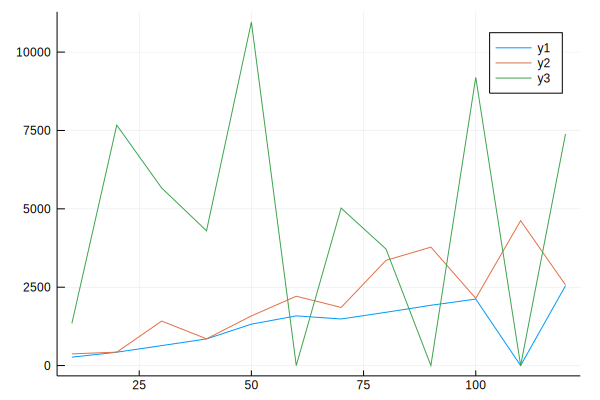

In [88]:
# no_debias_times = DataFrame(Normal   = normal_results_nodebias[:, 1],
#                             Logistic = logistic_results_nodebias[:, 1],
#                             Poisson  = poisson_results_nodebias[:, 1])
no_debias_times = [normal_results_nodebias[:, 1] logistic_results_nodebias[:, 1] poisson_results_nodebias[:, 1]]
yes_debias_times = [normal_results[:, 1] logistic_results[:, 1] poisson_results[:, 1]]
plot(model_sizes, yes_debias_times)

In [66]:
no_debias_times[zero_idx[1]]

0.0

In [77]:
using StatPlots, DataFrames
mydata = DataFrame(a = [1,missing,3], b = [2,3,4])
@df mydata line(model_sizes, :b)

ArgumentError: ArgumentError: Package StatPlots not found in current path:
- Run `import Pkg; Pkg.add("StatPlots")` to install the StatPlots package.
